### Implementing Linear Regression

This algorithm has been implemented in the file LinearRegression.py

```
from LinearRegression import LinearRegression
```

Here is a link to the LinearRegression class:

Within the LinearRegression Class there are 4 key functions:

```
LinearRegression.fit_analytic(X,y)   #fits our linear regression model to the data and initializes LinearRegression.w and LinearRegression.score_history

LinearRegression.fit_gradient(X,y)   #does the same as the fit method but implements gradient descent

LinearRegression.predict(X) #predicts labels based on feature matrix

LinearRegression.score(X,y) #determines accuracy of predicted labels

LinearRegression.fit_analytic(X,y) implements the following equation:
* w = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y

LinearRegression.fit_gradient(X,y) works as follows:
1. Initialize a random weight vector
2. Until Termination:
* w<sup>t+1</sup> = w<sup>t</sup> - 2 $\alpha$ X<sup>T</sup>(Xw -y)

### Linear Regression in Action

Here is an example of retrieving and visualizing data.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

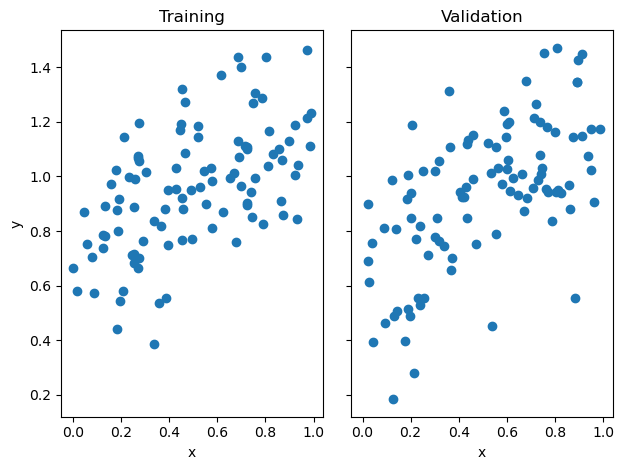

In [2]:
#Visualize data
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

Here is an example of LinearRegression.fit_analytic(X,y)

In [3]:
from LinearRegression import LinearRegression

LR = LinearRegression()
LR.fit_analytic(X_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

LR.w

Training score = 0.3078
Validation score = 0.3431


array([0.45874707, 0.72847835])

Here is an example of LinearRegression.fit_gradient(X,y) as well as a visualization of the score history.

In [4]:
LR2 = LinearRegression()

LR2.fit_gradient(X_train, y_train, alpha = 0.001, max_epochs = 1e3)
LR2.w

print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")


Training score = 0.3077
Validation score = 0.3403


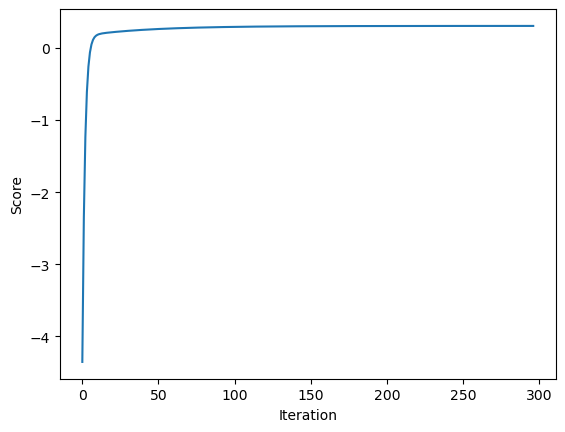

In [5]:
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

### Experiments


Here is a visualization of LinearRegression.fit_analytic(X,y) being run multiple times where the number of featurnes increases.

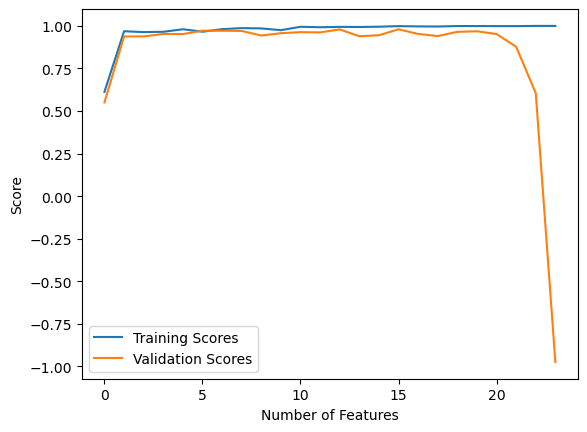

In [6]:
n = 25
p= 1

train_SCORES = []
val_SCORES = []

while p < n:
    X_train, y_train, X_val, y_val = LR_data(n_train = n,p_features = p)
    LR = LinearRegression()
    LR.fit_analytic(X_train, y_train, alpha = 0.001, max_epochs = 1e3)
    train_SCORES.append(LR.score(X_train, y_train))
    val_SCORES.append(LR.score(X_val, y_val))
    p += 1

plt.plot(train_SCORES, label = "Training Scores")
plt.plot(val_SCORES, label = "Validation Scores")
labels = plt.gca().set(xlabel = "Number of Features", ylabel = "Score")
legend = plt.legend()

We see that even though the accuracy score of our Linear Regression model increases for our training data as the number of features increases. However, the accuracy score for our testing data takes a huge drop off the higher the number of features is. This essentially shows that as the number of features increase, we overfit to the training data and produce inaccurate results for testing or outside data.


Here is a visualization of LinearRegression.fit_gradient(X,y) being run multiple times where the number of features increases.

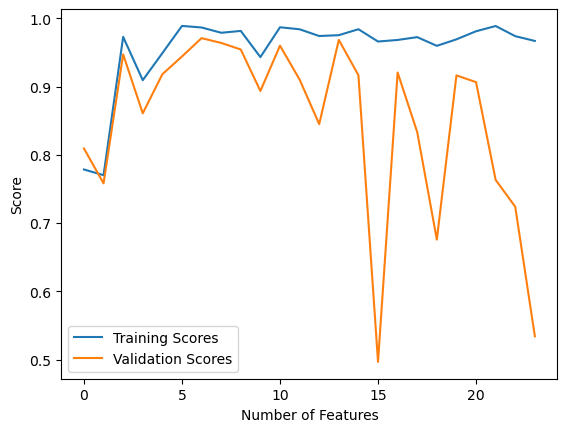

In [7]:
n = 25
p= 1

train_SCORES = []
val_SCORES = []

while p < n:
    X_train, y_train, X_val, y_val = LR_data(n_train = n,p_features = p)
    LR = LinearRegression()
    LR.fit_gradient(X_train, y_train, alpha = 0.001, max_epochs = 1e3)
    train_SCORES.append(LR.score(X_train, y_train))
    val_SCORES.append(LR.score(X_val, y_val))
    p += 1

plt.plot(train_SCORES, label = "Training Scores")
plt.plot(val_SCORES, label = "Validation Scores")
labels = plt.gca().set(xlabel = "Number of Features", ylabel = "Score")
legend = plt.legend()

Here, the scores of the validation data are consistently lower than that of the training data. This also shows how an increase in the number of features can ultimately lead to the model overfitting to the training data.


Here is a visualization of a LASSO regularization model being run multiple times where the number of features increases.

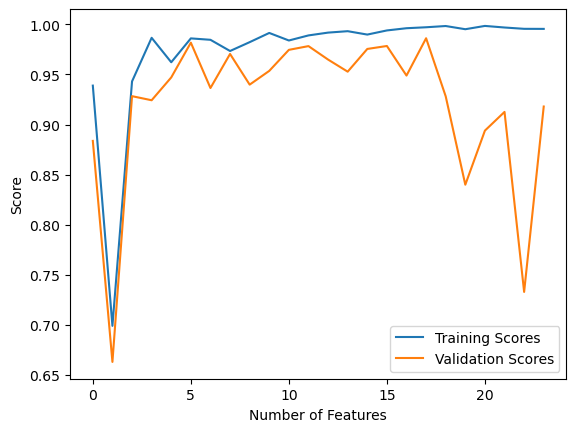

In [8]:
from sklearn.linear_model import Lasso


n = 25
p= 1

train_SCORES = []
val_SCORES = []

while p < n:
    X_train, y_train, X_val, y_val = LR_data(n_train = n,p_features = p)
    L = Lasso(alpha = 0.001)
    L.fit(X_train, y_train)
    train_SCORES.append(L.score(X_train, y_train))
    val_SCORES.append(L.score(X_val, y_val))
    p += 1

plt.plot(train_SCORES, label = "Training Scores")
plt.plot(val_SCORES, label = "Validation Scores")
labels = plt.gca().set(xlabel = "Number of Features", ylabel = "Score")
legend = plt.legend()

Much like the models before, the model seems to overfit to the training data as the number of features increases beyond a certain point. 